<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/GRU_Model_TensorFLow_dengan_ReviewTokoBaju_csv_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 **GRU Model TensorFLow dengan ReviewTokoBaju.csv Dataset**

# Install Library

In [1]:
pip install torch pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [21]:
!pip install torch pandas scikit-learn tensorflow matplotlib seaborn

# Import Library

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


# Load Dataset ReviewTokoBaju.csv

In [4]:
file_path = '/content/ReviewTokoBaju.csv'
data = pd.read_csv(file_path)

display(data)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Pre Processing

In [5]:
data = data.dropna(subset=['Review Text', 'Recommended IND'])  # Menghapus baris dengan Review Text atau Recommended IND yang kosong
data['Review Text'] = data['Review Text'].apply(lambda x: x.lower())  # Mengubah teks menjadi lowercase


<ipython-input-5-8bd0305da9b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review Text'] = data['Review Text'].apply(lambda x: x.lower())  # Mengubah teks menjadi lowercase


In [6]:
# Menyiapkan fitur (X) dan target (y)
X = data['Review Text']
y = data['Recommended IND']


In [7]:
# Tokenisasi menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Membatasi hanya 5000 fitur teratas
X_tfidf = vectorizer.fit_transform(X).toarray()


In [8]:

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# Bangun GRU Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [10]:
# Membuat model GRU
model = Sequential()


In [11]:
# Menambahkan layer GRU
model.add(GRU(64, input_shape=(X_train.shape[1], 1), return_sequences=False))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Menambahkan Dropout untuk menghindari overfitting
model.add(Dropout(0.2))


In [13]:
# Output layer (2 kelas: 0 untuk tidak direkomendasikan, 1 untuk direkomendasikan)
model.add(Dense(2, activation='softmax'))


In [14]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Menampilkan ringkasan model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,994 (50.76 KB)

 Trainable params: 12,994 (50.76 KB)

 Non-trainable params: 0 (0.00 B)

# Latih Model

In [16]:
# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 1176s 2s/step - accuracy: 0.8150 - loss: 0.4943 - val_accuracy: 0.8207 - val_loss: 0.4705
Epoch 2/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 1214s 2s/step - accuracy: 0.8174 - loss: 0.4781 - val_accuracy: 0.8207 - val_loss: 0.4735
Epoch 3/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 1222s 2s/step - accuracy: 0.8219 - loss: 0.4700 - val_accuracy: 0.8207 - val_loss: 0.4710
Epoch 4/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 1224s 2s/step - accuracy: 0.8232 - loss: 0.4689 - val_accuracy: 0.8207 - val_loss: 0.4704
Epoch 5/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 1221s 2s/step - accuracy: 0.8121 - loss: 0.4842 - val_accuracy: 0.8207 - val_loss: 0.4706
Epoch 6/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 1225s 2s/step - accuracy: 0.8197 - loss: 0.4740 - val_accuracy: 0.8207 - val_loss: 0.4703
Epoch 7/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 1165s 2s/step - accuracy: 0.8209 - loss: 0.4714 - val_accuracy: 0.8207 - val_loss: 0.4706
Epoch 8/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 1179s 2s/step - accuracy: 0.8112 - loss: 0.4855 - 

# Visualisasi

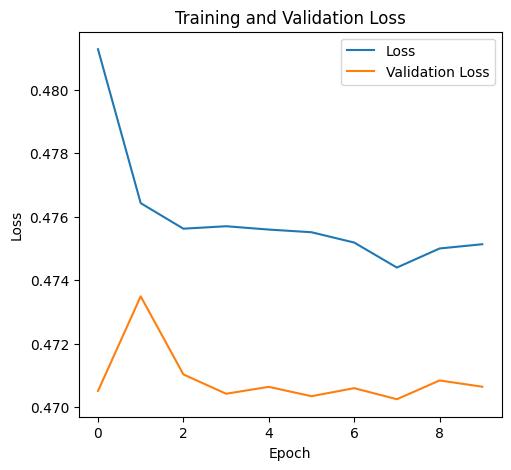

In [17]:
# Visualisasi Loss dan Accuracy
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


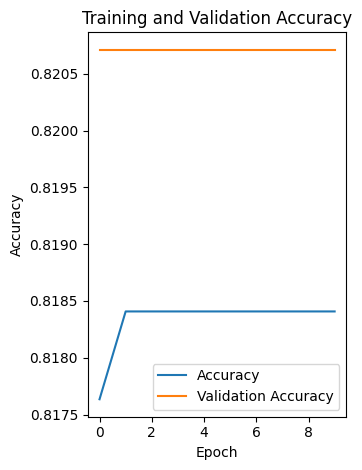

In [18]:
# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


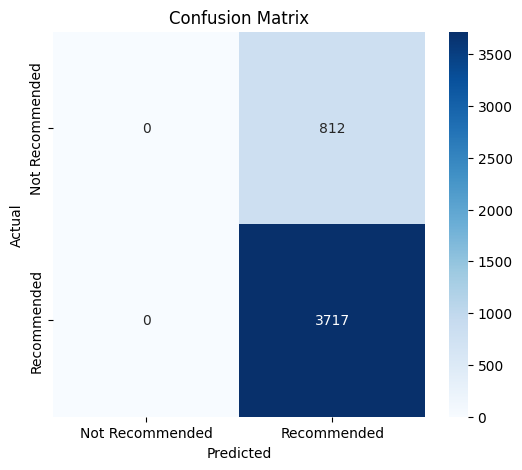

In [23]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


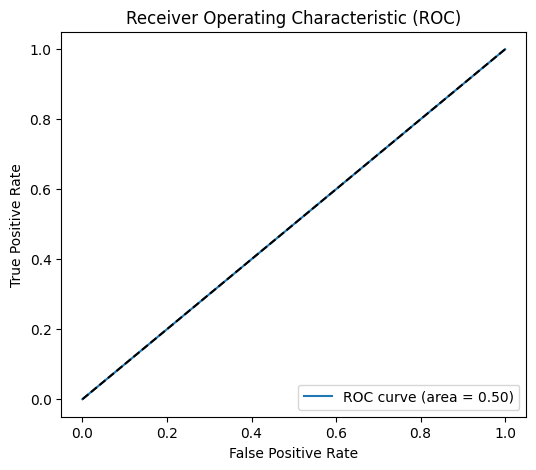

In [24]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Evaluasi Model

In [19]:
# Evaluasi model pada data test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


142/142 ━━━━━━━━━━━━━━━━━━━━ 108s 760ms/step


In [20]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred_classes)
fpr, tpr, _ = roc_curve(y_test, y_pred_classes)


In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)


In [22]:
# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8207
Precision: 0.8207
Recall: 1.0000
F1 Score: 0.9015
AUC: 0.5000
